In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

import os

## Enter parameters

In [2]:
ticker='ETH-USD'

start=pd.to_datetime('2018-01-01')
test_start=pd.to_datetime('2024-01-01')
end=pd.to_datetime('2024-12-31')

use_steps=30
steps_ahead=1

epochs=10
patience=10

#Fit series of prices or returns
kind='prices'
#kind='returns'

short = True #is shorting allowed or not in our strategy
fit   = True #if False loads existing data from fits folder; if no data exists, set to True

## Run code

Epoch 1/10
32/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4324   
Epoch 1: val_loss improved from inf to 0.06451, saving model to fits/ETH-USD/checkpoints/ETH-USD_linreg_cp.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3344 - val_loss: 0.0645
Epoch 2/10
43/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105 
Epoch 2: val_loss improved from 0.06451 to 0.00482, saving model to fits/ETH-USD/checkpoints/ETH-USD_linreg_cp.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - val_loss: 0.0048
Epoch 3/10
44/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 
Epoch 3: val_loss improved from 0.00482 to 0.00387, saving model to fits/ETH-USD/checkpoints/ETH-USD_linreg_cp.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 4/10
41/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch 4: val_loss improved from 0.00387 to 0.00386, saving model to fits/ETH-USD/checkpoints/ETH-USD_linreg_cp.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.00

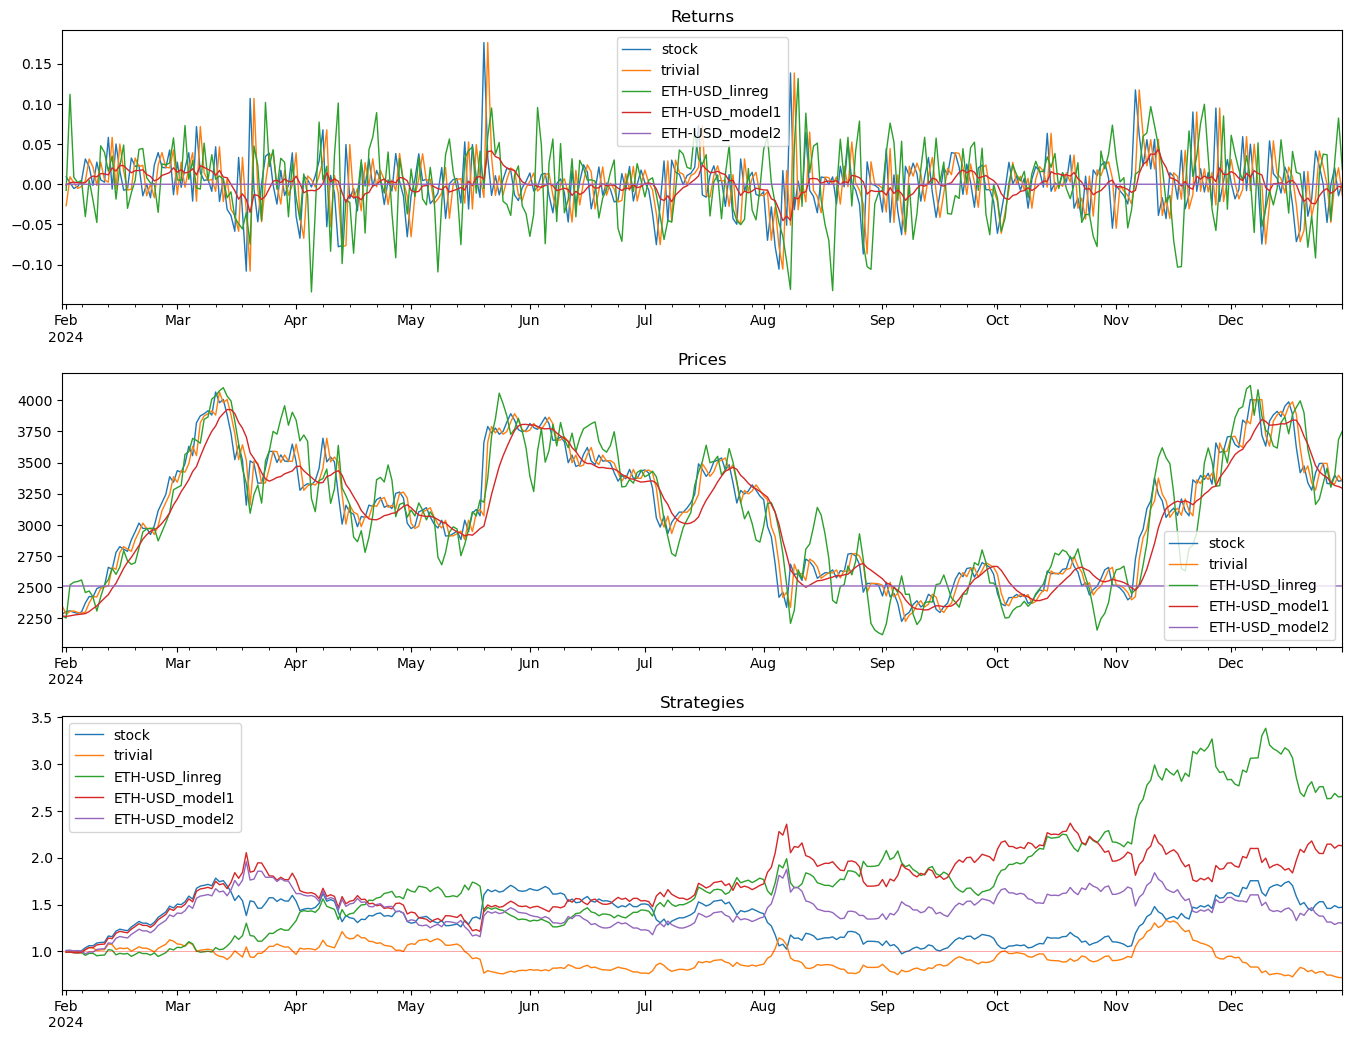

In [3]:
%run funcs.ipynb


#fetch data and preprocess
data=get_prices(ticker,start,end)
train_price,test_price = split_train_test(data,test_start)
if kind=='returns':
    data=log_ret(data).dropna()
train, test = split_train_test(data,test_start)
X_train,y_train, X_test,y_test=preprocess_train_test(train,test,use_steps,steps_ahead)



#fit and save models
dir_name=ticker
if fit==True:
    check_make_dir(name=dir_name)
    fits_path=get_paths(dir_name)[0]
    %run models.ipynb
    for model in models_to_fit:
        fit_save(dir_name, X_train,y_train,X_test,y_test,model, epochs=epochs, patience=patience)
        print('')
    train.to_csv(os.path.join(fits_path,'train.csv'))
    test.to_csv(os.path.join(fits_path,'test.csv'))



#load predictions and benchmarks
preds  = pd.DataFrame({'stock':test})
preds['trivial']  =   test.shift(1)

models = load_models(dir_name)
for (modelname,model) in models.items():
    preds[modelname]=create_pred(model,X_test)



#get results
dfs = get_rps(test_price,preds,kind)
get_plots(dfs)

## Final return

In [4]:
results=pd.DataFrame(dfs[2].iloc[-1,:]).T
results

,stock,trivial,ETH-USD_linreg,ETH-USD_model1,ETH-USD_model2
2024-12-30,1.470461,0.720682,2.653275,2.127713,1.303011
